In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

from matplotlib.colors import LogNorm

from scipy.interpolate import griddata

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-258akeio because the default path (/homedir/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
fc-list: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.25' not found (required by /opt/udiImage/modules/mpich/mpich-7.7.19/lib64/dep/libexpat.so.1)


In [2]:
from tractor import *
from tractor.galaxy import *
from tractor.sersic import *

In [3]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [8]:
band = 'g'
cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/imaging_mc/nea/stacked_psfex_{}_1024.fits'.format(band)))
print(len(cat))

mask = cat['fwhm_mean']!=0
cat = cat[mask]
print(len(cat))

400
320


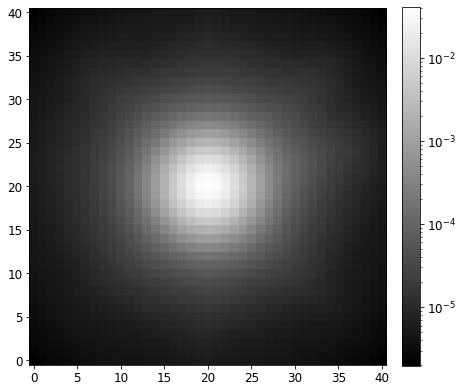

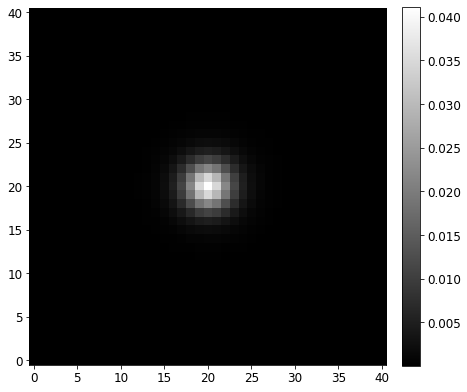

In [44]:
psfex_img = cat['psf_mask'][10]
shape_r = 0.4

W, H = 41, 41

tim = Image(data=np.zeros((H,W)), invvar=np.ones((H,W))/(0.01**2),
            psf=PixelizedPSF(psfex_img))

source = ExpGalaxy(PixPos(H//2, W//2), Flux(1.), GalaxyShape(shape_r/0.262, 1, 45.))
tractor = Tractor([tim], [source])

mod = tractor.getModelImage(0)


plt.figure(figsize=(7, 7))
plt.imshow(mod + 1e-6, origin='lower', cmap='gray', norm=LogNorm())
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

plt.figure(figsize=(7, 7))
plt.imshow(mod, origin='lower', cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

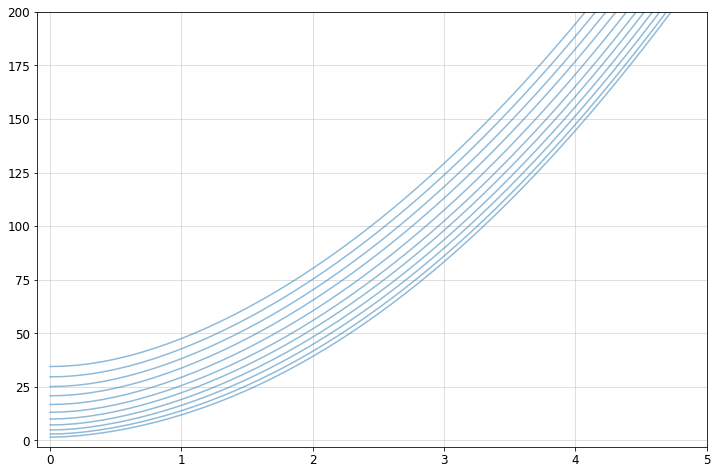

In [48]:
shape_r_list = np.arange(0., 5., 0.1)
nea_all = []

for index in range(0, len(cat), 30):
    psfex_img = cat['psf_mask'][index]
    
    W, H = 161, 161

    nea_list = []

    for shape_r in shape_r_list:

        tim = Image(data=np.zeros((H,W)), invvar=np.ones((H,W))/(0.01**2),
                    psf=PixelizedPSF(psfex_img))

        source = ExpGalaxy(PixPos(H//2, W//2), Flux(1.), GalaxyShape(shape_r/0.262, 1, 45.))
        tractor = Tractor([tim], [source])

        mod = tractor.getModelImage(0)

        nea = np.sum(mod)**2/np.sum(mod**2) # in unit of number of pixels
        # print('NEA = {:.2f} ({:.2f} arcsec^2)'.format(nea, nea*0.262**2))
        nea_list.append(nea)

    nea_all.append(np.array(nea_list))

plt.figure(figsize=(12, 8))
for index in range(len(nea_all)):
    plt.plot(shape_r_list, nea_all[index]*0.262**2, color='C0', alpha=0.5)
plt.axis([-0.1, 5, -3, 200])
plt.grid(alpha=0.5)
plt.show()

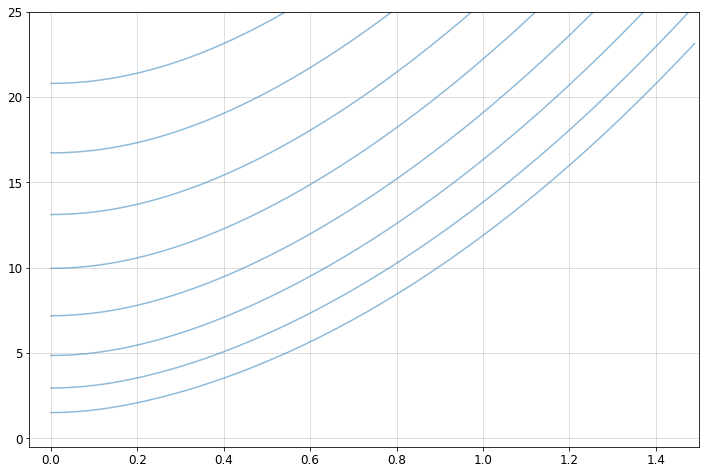

In [92]:
shape_r_list = np.arange(0., 1.5, 0.01)
nea_all = []

for index in range(0, len(cat), 30):
    psfex_img = cat['psf_mask'][index]
    
    W, H = 161, 161

    nea_list = []

    for shape_r in shape_r_list:

        tim = Image(data=np.zeros((H,W)), invvar=np.ones((H,W))/(0.01**2),
                    psf=PixelizedPSF(psfex_img))

        source = ExpGalaxy(PixPos(H//2, W//2), Flux(1.), GalaxyShape(shape_r/0.262, 1, 45.))
        tractor = Tractor([tim], [source])

        mod = tractor.getModelImage(0)

        nea = np.sum(mod)**2/np.sum(mod**2) # in unit of number of pixels
        # print('NEA = {:.2f} ({:.2f} arcsec^2)'.format(nea, nea*0.262**2))
        nea_list.append(nea)

    nea_all.append(np.array(nea_list))

plt.figure(figsize=(12, 8))
for index in range(len(nea_all)):
    plt.plot(shape_r_list, nea_all[index]*0.262**2, color='C0', alpha=0.5)
plt.axis([-0.05, 1.5, -0.5, 25])
plt.grid(alpha=0.5)
plt.show()